In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from sklearn.datasets import fetch_Seatle_housing
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split,cross_validate
from sklearn.metrics import mean_squared_error
from ipywidgets import interact, FloatSlider
from numpy.random import seed, randn
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Tratamiento de Datos

In [3]:
housing=housing.drop("Id",axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Quitar variables con mas del 50% de missings**

In [4]:
vars=np.round((housing.isnull()).sum()/len(housing),2)
vars[vars>.5]

Alley          0.94
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [5]:
bye=vars[vars>.5].index
bye

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [6]:
housing=housing.drop(bye,axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


**Analizamos los datos categoricos**

In [7]:
descat=housing.select_dtypes("object").describe()#.loc["unique"]
descat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,770,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,735,1360,380,870,605,1311,1326,1340,1267,1198


**Quitamos variables cuyo valor mas frecuente está en más del 95% de los datos**

In [8]:
byecat=descat.loc["freq"]/descat.loc["count"]
byecat[byecat>.95]

Street         0.99589
Utilities     0.999315
Condition2    0.989726
RoofMatl      0.982192
Heating       0.978082
GarageQual    0.950689
GarageCond    0.961566
dtype: object

In [9]:
housing=housing.drop(byecat[byecat>.95].index,axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
#housing.info()

**Analizamos las variables numéricas**

In [11]:
descnum=housing.select_dtypes(["float64","int64"]).describe()
descnum

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
byenum=descnum.loc["75%"]==descnum.loc["min"]
byenum[byenum]

BsmtFinSF2       True
LowQualFinSF     True
BsmtHalfBath     True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
dtype: bool

In [13]:
descnum[byenum[byenum].index]

,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,46.549315,5.844521,0.057534,21.954110,3.409589,15.060959,2.758904,43.489041
std,161.319273,48.623081,0.238753,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1474.000000,572.000000,2.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


**Eliminamos variables númericas que tienen el mismo valor en el 75% de los casos i. e. poca varianza**

In [14]:
housing=housing.drop(byenum[byenum].index,axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,2,548,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,2,460,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,2,608,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,3,642,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,3,836,Y,192,84,12,2008,WD,Normal,250000


In [15]:
#sns.pairplot(housing[numeric_features])

# Pipeline

**hacemos un pipeline diferenciado para variables numéricas y categoricas**

**Numéricas:** imputamos missings con la mediana, y estandarizamos los datos.

**Categóricas:** imputamos missings con una categoría y hacemos variables dummies con oneHot encoder.

Finalmente aplicamos este proceso a todos los datos.

**LabelEncoder**.- en vez de hacer variables dummies hacemos etiquetas por categoría.

In [16]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        #if self.columns is not None:
        for col in range(output.shape[1]):
                #print(col)
            output[:,col] = LabelEncoder().fit_transform(output[:,col])
        #else:
        #    for colname,col in output.iteritems():
         #       output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

**Logtransform**.-Creamos una clase para transformar datos en logaritmo natural de cada columna:

$$
arglog(n) = \left \{ \begin{matrix} -log(|n|) & \mbox{si }n<0
\\ log(n+1) & \mbox{si }n\ge0\end{matrix}\right. 
$$

In [17]:
class MultiColumnLogTrans:
    import numpy as np
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here
    

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        np.log(). If no columns specified, transforms all
        columns in X.
        '''
        def arglog(x):
            x=float(x)
            if x<0:
                sal=-np.log(abs(x))
            else:
                sal=np.log(x+1)
            return sal
        
        output = X.copy().astype(float)
        for col in range(output.shape[1]):
            
            
            #print(col)
                
            output[:,col] = np.array(list(map(arglog,output[:,col])))
            #LabelEncoder().fit_transform(output[:,col])

        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

**Pipelines para numericas**

In [18]:
numeric_features=housing.select_dtypes("int64","float64").drop('SalePrice',axis=1).columns

numeric_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),('trans',MultiColumnLogTrans())])

**Pipelines para categóricas**

In [19]:
categorical_features =housing.select_dtypes("object").columns

categorical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('le', MultiColumnLabelEncoder()),('sacaler',MinMaxScaler()),("pca",PCA(n_components=20))])

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features),
        ('cat', categorical_transformer1, categorical_features)])

# Data Partition

In [21]:
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

# Magic Loop

Creamos una función que pueda comparar distintos modelos con distintos parámetros usando gridsearch para seleccionar el mejor de ellos con respecto a su $R^2$ en este caso

In [22]:
def define_hyper_params():
    """
        Esta función devuelve un diccionario con
        los clasificadores que vamos a utilizar y
        una rejilla de hiperparámetros
    """
    ## Por ejemplo
    # Create space of candidate learning algorithms and their hyperparameters
    classifier = {
         'Lasso': Lasso()
     }
    
    search_space = [{'classifier': [Lasso(tol=0.5)],
                 'classifier__alpha': [0.1 * 10 ** (i/2) for i in range(1, 11)],
                 },
                {'classifier': [Ridge(tol=.5)],
                 'classifier__alpha': [0.1 * 10 ** (i/2) for i in range(1, 11)],
                 },
                   {'classifier': [LinearRegression()],
                 'classifier__fit_intercept': [True,False],
                    'classifier__normalize':[True,False],
                   }
                   ]

    return (classifier,search_space)

In [23]:
    
def magic_loop(X_train, y_train,models_to_run=['Lasso','Ridge','LR']):
    
    
 
   
    classifier,search_space=define_hyper_params()#Modelos y parámetros Definidos que vamos a usar


    pipe = Pipeline([("preprocessor", preprocessor),('classifier', classifier[models_to_run[0]])])

    
    clf = GridSearchCV(pipe, search_space, cv=10, verbose=3,scoring='r2',n_jobs=4,return_train_score=True)
    
    #ajustamos el mejor modelo
    best_model = clf.fit(X_train, y_train)#ajustamos con el X?train
    cvres = clf.cv_results_
    #obtenemos el mejor modelo y sus parámetros
    win=best_model.best_estimator_.get_params()['classifier']

    print('EL r2 SCORE DEL CROSS VAL DEL MODELO GANADOR ES:',best_model.best_score_)
    
    print('Mejor modelo fue:' ,win)
    return(win,cvres)#Regresa el mejor modelo

In [24]:
winner,cvres=magic_loop(xtrain, ytrain)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    7.7s


EL r2 SCORE DEL CROSS VAL DEL MODELO GANADOR ES: 0.8516331731949158
Mejor modelo fue: Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.5)


[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   12.4s finished


In [25]:
winner

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.5)

In [26]:
neww= Pipeline([("preprocessor", preprocessor),('winner', winner)])

In [27]:
cv = cross_validate(neww, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

In [28]:
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.85
mean mae: 18,585.57


In [29]:
print(f"Se encontró un modelo con r2={r2.mean():0.2f}")

Se encontró un modelo con r2=0.85


In [30]:
#[0.1 * 10 ** (i/2) for i in range(1, 11)]

In [31]:
alphas = [0.1 * 10 ** (i/2) for i in range(1, 8)]

In [32]:
#cvres["mean_test_score"][10:17]

Text(0.5, 1.0, 'Comparativo de $R^2$ train cv')

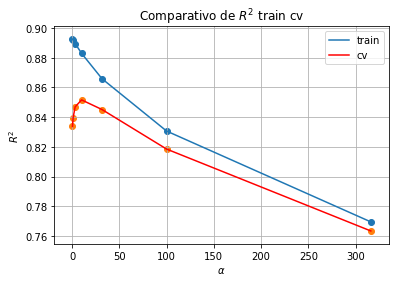

In [33]:
#cvres = gsearch.cv_results_
train_score = cvres["mean_train_score"][10:17]
test_score = cvres["mean_test_score"][10:17]

plt.plot(alphas, train_score, label="train")
plt.scatter(alphas, train_score)
plt.plot(alphas, test_score, label="cv",color="r")
plt.scatter(alphas, test_score)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$R^2$")
plt.legend(); plt.grid();
plt.title(r"Comparativo de $R^2$ train cv")

# Tarea demostracion derivada logistica

$
\dfrac{d}{dx} \sigma(x) = \dfrac{d}{dx} \left[ \dfrac{1}{1 + e^{-x}} \right]
$

$
= -(1+e^{-x})^{-2}(-e^{-x})
$

$
=\dfrac{e^{-x}}{(1+e^{-x})^2}
$

$
= \dfrac{1}{1 + e^{-x}} \cdot \dfrac{e^{-x}}{1 + e^{-x}}
$

$
= \dfrac{1}{1 + e^{-x}} \cdot \dfrac{(1 + e^{-x}) - 1}{1 + e^{-x}}
$

$
= \dfrac{1}{1 + e^{-x}} \cdot \left( 1 - \dfrac{1}{1 + e^{-x}} \right)
$

$
= \sigma(x) \cdot(1 - \sigma(x))
$